In [4]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import processing_netcdf as pcdf
import geopandas as gpd
from geopandas import GeoDataFrame
import shapely.geometry 
import numpy as np
from shapely import geometry as gmty
from geofeather import to_geofeather, from_geofeather
import glob
import os
import pyarrow
from xclim import ensembles as ens
from xclim import subset

In [2]:
folder = "/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/"
out_folder = "/home/mlopez/EXEC/TimeMeansModels/"

# Select and open Region (Shapefile)

In [5]:
shapefile = ("/home/mlopez/EXEC/Shapefiles/DDE_STF_20K_REG_FOR_VUE_S.shp")
poly = gpd.read_file(shapefile)
poly= poly.to_crs('epsg:4326')
poly

,OBJECTID,NO_REG_FOR,NM_REG_FOR,NO_UG_RAF,SUP_KM2,DATE_PUBLI,Shape_Leng,Shape_Area,D_GENERAL,geometry
0,1,01,BAS-SAINT-LAURENT,"011, 012",27645.7,2019-11-30,1.018112e+06,2.743725e+10,Sud-est,"POLYGON ((-68.24266 48.85438, -68.18955 48.875..."
1,2,02,SAGUENAY -LAC-SAINT-JEAN,"023, 024, 025, 027",102315.5,2019-11-30,2.642611e+06,1.011782e+11,Nord-est,"POLYGON ((-71.02818 52.21282, -71.02784 52.213..."
2,3,03,CAPITALE-NATIONALE-CHAUDIÈRE-APPALACHES,"035, 037",35573.9,2019-11-30,1.295862e+06,3.544054e+10,Centre du Québec,"POLYGON ((-70.24926 46.12110, -70.24936 46.120..."
3,4,04,MAURICIE-CENTRE-DU-QUÉBEC,"041, 042",52443.7,2019-11-30,1.903121e+06,5.216317e+10,Centre du Québec,"POLYGON ((-72.70529 45.75959, -72.70536 45.759..."
4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud,"POLYGON ((-72.27288 45.61310, -72.27288 45.613..."
5,6,07,OUTAOUAIS,"071, 072, 073, 074",39030.0,2019-11-30,1.677902e+06,3.893718e+10,Sud-ouest,"POLYGON ((-74.72535 45.85802, -74.72646 45.852..."
6,7,08,ABITIBI-TEMISCAMINGUE,"081, 082, 083, 084, 085, 086",57124.2,2019-11-30,1.961835e+06,5.674050e+10,Nord-ouest,"POLYGON ((-77.86075 46.21053, -77.86104 46.210..."
7,8,09,COTE-NORD,"093, 094, 097",379435.8,2019-11-30,5.360494e+06,3.744732e+11,Nord-est,"POLYGON ((-70.02990 52.89020, -67.32805 52.884..."
8,9,10,NORD-DU-QUEBEC,"102, 105, 106, 107",0.1,2019-11-30,1.858192e+03,1.456492e+05,Nord-ouest,"POLYGON ((-78.76555 48.69057, -78.76556 48.690..."
9,10,10,NORD-DU-QUEBEC,"102, 105, 106, 107",48.3,2019-11-30,3.542201e+04,4.789565e+07,Nord-ouest,"POLYGON ((-78.65906 48.69034, -78.66015 48.690..."


# Select variable

In [6]:
filesSeas =  glob.glob(folder+"*rcp85_tg_mean_seasonal.nc")
files = glob.glob(folder+"*rcp85_tg_mean_annual.nc")
#ex: ACCESS1-3_rcp45_tn_mean_annual.nc
print(files)
print(filesSeas)


['/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/ACCESS1-3_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/BNU-ESM_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/CanESM2_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/CMCC-CMS_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/GFDL-ESM2M_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/HadGEM2-CC_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/INM-CM4_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/IPSL-CM5A-LR_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/IPSL-CM5B-LR_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/MPI-ESM-LR_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/NorESM1-M_rcp85_tg_mean_annual.nc']
['/scen3/scenario/netcdf/ouranos/portrai

# Open Mask if already created or create it. 

In [7]:
dsEns= ens.create_ensemble(files)
dsEnsSeas = ens.create_ensemble(filesSeas)
dsEns
if os.path.exists(shapefile.replace('.shp','.nc')):
    mask = xr.open_dataset(shapefile.replace('.shp','.nc'))
    mask = mask.__xarray_dataarray_variable__
    
else:
    mask= subset.create_mask(poly=poly, x_dim=dsEns.lon, y_dim=dsEns.lat)
    mask = mask.T
    mask.to_netcdf(shapefile.replace('.shp','.nc'))

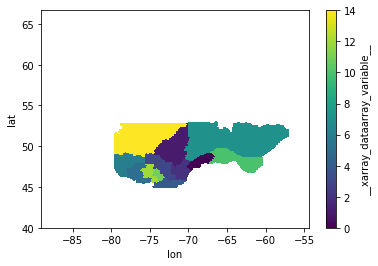

In [8]:
mask.plot()

# Figure - Time Series

In [9]:
# figure
dsEns = dsEns.assign_coords({'region':mask})
# spatial means - grouby region mask
out = dsEns.groupby(dsEns.region).mean()
print(out)
# Calculate ensembles percentiles on regional means
perctiles = ens.ensemble_percentiles(out)
perctiles

<xarray.Dataset>
Dimensions:      (realization: 11, region: 13, time: 151)
Coordinates:
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * time         (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2100-01-01
  * region       (region) float64 0.0 1.0 2.0 3.0 4.0 ... 10.0 11.0 12.0 14.0
Data variables:
    tg_mean      (region, realization, time) float32 dask.array<chunksize=(1, 1, 10), meta=np.ndarray>


<xarray.Dataset>
Dimensions:      (realization: 11, region: 13, time: 151)
Coordinates:
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * time         (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2100-01-01
  * region       (region) float64 0.0 1.0 2.0 3.0 4.0 ... 10.0 11.0 12.0 14.0
Data variables:
    tg_mean_p10  (region, time) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>
    tg_mean_p50  (region, time) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>
    tg_mean_p90  (region, time) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>

In [10]:
# Seasonal example
dsEnsSeas
dsEnsSeas = dsEnsSeas.assign_coords({'region':mask})
out = dsEnsSeas.groupby(dsEnsSeas.region).mean()
# Calculate ensembles percentiles on regional means
perctiles = ens.ensemble_percentiles(out)
perctiles

<xarray.Dataset>
Dimensions:      (realization: 11, region: 13, time: 605)
Coordinates:
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * time         (time) datetime64[ns] 1949-12-01 1950-03-01 ... 2100-12-01
  * region       (region) float64 0.0 1.0 2.0 3.0 4.0 ... 10.0 11.0 12.0 14.0
Data variables:
    tg_mean_p10  (region, time) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>
    tg_mean_p50  (region, time) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>
    tg_mean_p90  (region, time) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>

# To create maps

In [11]:
# Mapping data - 30 year means
tmp1 = dsEns.sel(time=(dsEns.time.dt.year>=1981))
window = 30
time1 = tmp1.time[0::window]

ds30yavg = tmp1.coarsen(time=window).mean()
ds30yavg['time'] = time1
perc30yavg = ens.ensemble_percentiles(ds30yavg)
perc30yavg # entire grid

# Mapping data
# select data for individual regions
reg_ids = np.unique(mask.values)
reg_ids = reg_ids[np.where(~np.isnan(reg_ids))]
for r in reg_ids:
    print(r)
    if ~np.isnan(r):
        reg = perc30yavg.where(mask==r, drop=True)
        print(reg)
        # export ot netcdf?

0.0
<xarray.Dataset>
Dimensions:      (lat: 25, lon: 44, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 49.12401 49.04068 48.95735 ... 47.20742 47.12409
  * lon          (lon) float32 -70.1293 -70.04597 ... -66.62944 -66.54611
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 7.0 7.0 7.0 7.0 7.0 ... nan nan nan nan nan
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 25, 44), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 25, 44), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 25, 44), meta=np.ndarray>
1.0
<xarray.Dataset>
Dimensions:      (lat: 65, lon: 56, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 52.79053 52.7072 52.62387 ... 47.54074 47.45741
  * lon          (lon) float32 -74.37913 -74.2958 ... -69.87931 

<xarray.Dataset>
Dimensions:      (lat: 51, lon: 112, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 52.79053 52.7072 52.62387 ... 48.70736 48.62403
  * lon          (lon) float32 -79.46226 -79.37893 ... -70.29596 -70.21263
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... 1.0 1.0 1.0 7.0 7.0
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 51, 112), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 51, 112), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 51, 112), meta=np.ndarray>


In [12]:
# Seasonal example 30 y means
for s in dsEnsSeas.time.dt.season:
    
    tmp1 = dsEnsSeas.sel(time=(dsEnsSeas.time.dt.year>=1981))
    tmp1 = tmp1.sel(time=(tmp1.time.dt.season==s))
    print(tmp1)
    
    # .... same as annual above
    



<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-09-01 1982-09-01 ... 2100-09-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-09-01 1982-09-01 ... 2100-09-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-09-01 1982-09-01 ... 2100-09-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-09-01 1982-09-01 ... 2100-09-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-03-01 1982-03-01 ... 2100-03-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 2, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-09-01 1982-09-01 ... 2100-09-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-03-01 1982-03-01 ... 2100-03-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 2, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-09-01 1982-09-01 ... 2100-09-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

# To create the Table

In [95]:
# Table 
# Similar to maps but with spatial avg as well

dsEns = dsEns.assign_coords({'region':mask})

# Mapping data - 30 year means
tmp1 = dsEns.sel(time=(dsEns.time.dt.year>=1981))
window = 30
time1 = tmp1.time[0::window]

# 30 y means
ds30yavgTable = tmp1.coarsen(time=window).mean()
ds30yavgTable['time'] = time1

# spatial mean
ds30yavgTable = ds30yavgTable.groupby(ds30yavgTable.region).mean()

perc30yavgTable = ens.ensemble_percentiles(ds30yavgTable)
perc30yavgTable 


<xarray.Dataset>
Dimensions:      (realization: 11, region: 13, time: 4)
Coordinates:
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * region       (region) float64 0.0 1.0 2.0 3.0 4.0 ... 10.0 11.0 12.0 14.0
Data variables:
    tg_mean_p10  (region, time) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    tg_mean_p50  (region, time) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    tg_mean_p90  (region, time) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>

# Get array of all models

In [13]:
arrays = []
for file in files:
    fname = os.path.basename(file)
    #fbase = os.path.splitext(fname)[0]
    print(fname)
    data = xr.open_dataset(file)
    
    global index
    index = data.indexes['time']
    if index.dtype != "<M8[ns]":
        data['time'] = index.to_datetimeindex()
    arrays.append(data)
    print (data)

ACCESS1-3_rcp85_tg_mean_annual.nc
<xarray.Dataset>
Dimensions:  (lat: 320, lon: 416, time: 151)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2100-01-01
  * lon      (lon) float32 -89.04521 -88.96188 -88.87855 ... -54.54659 -54.46326
  * lat      (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
Data variables:
    tg_mean  (time, lat, lon) float32 ...
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. For internal use only.
BNU-ESM_rcp85_tg_mean_annual.nc
<xarray.Dataset>
Dimensions:  (lat: 320, lon: 416, time: 151)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2100-01-

<ipython-input-13-6fda97e0baaf>:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  data['time'] = index.to_datetimeindex()
<ipython-input-13-6fda97e0baaf>:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  data['time'] = index.to_datetimeindex()
<ipython-input-13-6fda97e0baaf>:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  data['time'] = index.to_date

In [14]:
big_data = xr.concat(arrays, "model")

In [15]:
big_data

<xarray.Dataset>
Dimensions:  (lat: 320, lon: 416, model: 11, time: 151)
Coordinates:
  * lon      (lon) float32 -89.04521 -88.96188 -88.87855 ... -54.54659 -54.46326
  * lat      (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * time     (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2100-01-01
Dimensions without coordinates: model
Data variables:
    tg_mean  (model, time, lat, lon) float32 258.8261 258.92606 ... nan nan
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. For internal use only.

# Create DF of all models

In [17]:
# takes 1 min
%time df = big_data.to_dataframe().dropna()
df = df.reset_index()
df

CPU times: user 41.2 s, sys: 4min 2s, total: 4min 43s
Wall time: 41.1 s


,lat,lon,model,time,tg_mean
0,66.623306,-89.045212,0,1950-01-01,258.826111
1,66.623306,-89.045212,0,1951-01-01,258.880676
2,66.623306,-89.045212,0,1952-01-01,258.705017
3,66.623306,-89.045212,0,1953-01-01,258.466431
4,66.623306,-89.045212,0,1954-01-01,259.760803
...,...,...,...,...,...
126578161,40.041039,-74.045807,10,2096-01-01,289.984100
126578162,40.041039,-74.045807,10,2097-01-01,290.481293
126578163,40.041039,-74.045807,10,2098-01-01,290.068420
126578164,40.041039,-74.045807,10,2099-01-01,290.675110


In [19]:
df.to_feather(out_folder + "df_tgrcp85_annual_11models.feather")

In [5]:
df = pd.read_feather("/home/mlopez/EXEC/TimeMeansModels/df_tgrcp85_annual_11models.feather", columns=None, use_threads=True);

In [20]:
df

,lat,lon,model,time,tg_mean
0,66.623306,-89.045212,0,1950-01-01,258.826111
1,66.623306,-89.045212,0,1951-01-01,258.880676
2,66.623306,-89.045212,0,1952-01-01,258.705017
3,66.623306,-89.045212,0,1953-01-01,258.466431
4,66.623306,-89.045212,0,1954-01-01,259.760803
...,...,...,...,...,...
126578161,40.041039,-74.045807,10,2096-01-01,289.984100
126578162,40.041039,-74.045807,10,2097-01-01,290.481293
126578163,40.041039,-74.045807,10,2098-01-01,290.068420
126578164,40.041039,-74.045807,10,2099-01-01,290.675110


# Split 11 models by periods 

In [9]:
year_groups = {y:0 for y in range(1980,2011)}
year_groups.update({y:1 for y in range(2041,2071)})
year_groups.update({y:2 for y in range(2071,2101)})

#takes 2 min
%time dfp = df2.groupby([df2.time.dt.year.map(year_groups), "lat","lon", "model"]).mean()

CPU times: user 1min 18s, sys: 7min 20s, total: 8min 38s
Wall time: 1min 42s


In [11]:
dfp.reset_index()

,time,lat,lon,model,index,tg_mean
0,0.0,40.041039,-89.045212,0,126277570.0,284.640381
1,0.0,40.041039,-89.045212,1,126277721.0,284.770447
2,0.0,40.041039,-89.045212,2,126277872.0,284.807953
3,0.0,40.041039,-89.045212,3,126278023.0,284.823608
4,0.0,40.041039,-89.045212,4,126278174.0,284.731598
...,...,...,...,...,...,...
2514793,2.0,66.623306,-61.296322,6,373105.5,266.407166
2514794,2.0,66.623306,-61.296322,7,373256.5,269.896942
2514795,2.0,66.623306,-61.296322,8,373407.5,269.994873
2514796,2.0,66.623306,-61.296322,9,373558.5,269.326660


In [12]:
dfp.drop(columns=['index'])

tg_mean
time lat       lon        model            
0.0  40.041039 -89.045212 0      284.640381
                          1      284.770447
                          2      284.807953
                          3      284.823608
                          4      284.731598
...                                     ...
2.0  66.623306 -61.296322 6      266.407166
                          7      269.896942
                          8      269.994873
                          9      269.326660
                          10     269.428772

[2514798 rows x 1 columns]

In [50]:
df2050 = dfp.query("time==1.0").reset_index()
df2080 = dfp.query("time==2.0").reset_index()

In [51]:
df20501 = df2050.drop(columns=['index'])
df20801 = df2080.drop(columns=['index'])

In [45]:
df20501

,time,lat,lon,model,tg_mean
0,1.0,40.041039,-89.045212,0,287.573822
1,1.0,40.041039,-89.045212,1,287.898254
2,1.0,40.041039,-89.045212,2,287.897919
3,1.0,40.041039,-89.045212,3,288.027100
4,1.0,40.041039,-89.045212,4,286.441010
...,...,...,...,...,...
838261,1.0,66.623306,-61.296322,6,264.648468
838262,1.0,66.623306,-61.296322,7,267.856171
838263,1.0,66.623306,-61.296322,8,267.888397
838264,1.0,66.623306,-61.296322,9,267.233704


# Get the 3 percentiles for 11 models for 2 periods

In [38]:
#10:42:18 - 10:53:13 = 10 min 47s
%time dftgm2 = dfp.reset_index().groupby(["lat", "lon", "time"]).quantile([0.1,0.5,0.9]) 


CPU times: user 4min 41s, sys: 19.6 s, total: 5min 1s
Wall time: 12.5 s


In [39]:
dftgm2

model        index     tg_mean
lat       lon        time                                    
40.041039 -89.045212 0.0  0.1    1.0  126277721.0  284.620819
                          0.5    5.0  126278325.0  284.770447
                          0.9    9.0  126278929.0  284.817078
                     1.0  0.1    1.0  126277781.5  286.659210
                          0.5    5.0  126278385.5  287.839142
...                              ...          ...         ...
66.623306 -61.296322 1.0  0.5    5.0     372924.5  267.828003
                          0.9    9.0     373528.5  268.276093
                     2.0  0.1    1.0     372350.5  267.468475
                          0.5    5.0     372954.5  269.896942
                          0.9    9.0     373558.5  270.860626

[685854 rows x 3 columns]

## Percentiles for 2050

In [48]:
#takes 3 seconds
%time dftgm2050 = df20501.reset_index().groupby(["lat", "lon"]).quantile([0.1,0.5,0.9]) 

CPU times: user 1min 20s, sys: 4.78 s, total: 1min 25s
Wall time: 2.43 s


In [49]:
dftgm2050

index  time  model     tg_mean
lat       lon                                              
40.041039 -89.045212 0.1       1.0   1.0    1.0  286.659210
                     0.5       5.0   1.0    5.0  287.839142
                     0.9       9.0   1.0    9.0  288.027100
          -88.961884 0.1      12.0   1.0    1.0  286.639893
                     0.5      16.0   1.0    5.0  287.819672
...                            ...   ...    ...         ...
66.623306 -61.379650 0.5  838249.0   1.0    5.0  267.221313
                     0.9  838253.0   1.0    9.0  267.726227
          -61.296322 0.1  838256.0   1.0    1.0  266.553040
                     0.5  838260.0   1.0    5.0  267.828003
                     0.9  838264.0   1.0    9.0  268.276093

[228618 rows x 4 columns]

## Percentiles for 2080

In [52]:
%time dftgm2080 = df20801.reset_index().groupby(["lat", "lon"]).quantile([0.1,0.5,0.9]) 

CPU times: user 1min 22s, sys: 4.19 s, total: 1min 26s
Wall time: 2.42 s


In [109]:
df20801

,time,lat,lon,model,tg_mean
0,2.0,40.041039,-89.045212,0,289.429352
1,2.0,40.041039,-89.045212,1,290.146240
2,2.0,40.041039,-89.045212,2,289.981934
3,2.0,40.041039,-89.045212,3,289.810089
4,2.0,40.041039,-89.045212,4,287.945221
...,...,...,...,...,...
838261,2.0,66.623306,-61.296322,6,266.407166
838262,2.0,66.623306,-61.296322,7,269.896942
838263,2.0,66.623306,-61.296322,8,269.994873
838264,2.0,66.623306,-61.296322,9,269.326660


In [ ]:
P

## Split DF by percentiles

### For 2050

In [64]:
dfq12050 = dftgm2050.query("model == 1.0")

dfq52050 = dftgm2050.query("model == 5.0")

dfq92050 = dftgm2050.query("model == 9.0")

### For 2080

In [60]:
dfq12080 = dftgm2080.query("model == 1.0")

dfq52080 = dftgm2080.query("model == 5.0")

dfq92080 = dftgm2080.query("model == 9.0")

In [59]:
dfq12080

index  time  model     tg_mean
lat       lon                                              
40.041039 -89.045212 0.1       1.0   2.0    1.0  287.945221
          -88.961884 0.1      12.0   2.0    1.0  287.928162
          -88.878548 0.1      23.0   2.0    1.0  287.919922
          -88.795219 0.1      34.0   2.0    1.0  287.899933
          -88.711891 0.1      45.0   2.0    1.0  287.919708
...                            ...   ...    ...         ...
66.623306 -61.629639 0.1  838212.0   2.0    1.0  266.877563
          -61.546310 0.1  838223.0   2.0    1.0  266.571625
          -61.462978 0.1  838234.0   2.0    1.0  266.784515
          -61.379650 0.1  838245.0   2.0    1.0  266.860474
          -61.296322 0.1  838256.0   2.0    1.0  267.468475

[76206 rows x 4 columns]

# Transform temp to Celsius

In [65]:
dfC12050 = dfq12050.copy()
dfC12050["tg_mean"] = dfC12050["tg_mean"] -273.15

dfC52050 = dfq52050.copy()
dfC52050["tg_mean"] = dfC52050["tg_mean"] -273.15

dfC92050 = dfq92050.copy()
dfC92050["tg_mean"] = dfC92050["tg_mean"] -273.15

In [62]:
dfC12080 = dfq12080.copy()
dfC12080["tg_mean"] = dfC12080["tg_mean"] -273.15

dfC52080 = dfq52080.copy()
dfC52080["tg_mean"] = dfC52080["tg_mean"] -273.15

dfC92080 = dfq92080.copy()
dfC92080["tg_mean"] = dfC92080["tg_mean"] -273.15


In [63]:
dfC12080

index  time  model    tg_mean
lat       lon                                             
40.041039 -89.045212 0.1       1.0   2.0    1.0  14.795221
          -88.961884 0.1      12.0   2.0    1.0  14.778162
          -88.878548 0.1      23.0   2.0    1.0  14.769922
          -88.795219 0.1      34.0   2.0    1.0  14.749933
          -88.711891 0.1      45.0   2.0    1.0  14.769708
...                            ...   ...    ...        ...
66.623306 -61.629639 0.1  838212.0   2.0    1.0  -6.272437
          -61.546310 0.1  838223.0   2.0    1.0  -6.578375
          -61.462978 0.1  838234.0   2.0    1.0  -6.365485
          -61.379650 0.1  838245.0   2.0    1.0  -6.289526
          -61.296322 0.1  838256.0   2.0    1.0  -5.681525

[76206 rows x 4 columns]

## Import dataframe with polygons

In [66]:
dfpolyshape = from_geofeather('Grid-TerritoiresGuides.feather')

/home/mlopez/EXEC/anaconda3/envs/python37-2/lib/python3.8/site-packages/geofeather/core.py:85: UserWarning: Grid-TerritoiresGuides.feather.crs coordinate reference system file is missing. No crs will be set for this GeoDataFrame.
  warnings.warn(


In [67]:
dfpolyshape

,lat,lon,TER_GUIDE,geometry
0,52.957191,-67.712730,6opqr,"POLYGON ((-67.67107 52.93424, -67.67107 52.915..."
1,52.957191,-67.629402,6opqr,"POLYGON ((-67.67107 52.91553, -67.67107 52.934..."
2,52.957191,-67.546066,6opqr,"POLYGON ((-67.56730 52.91553, -67.57974 52.915..."
3,52.873859,-67.796059,6opqr,"POLYGON ((-67.75439 52.89329, -67.75439 52.832..."
4,52.873859,-67.712730,6opqr,"POLYGON ((-67.75439 52.83219, -67.75439 52.893..."
...,...,...,...,...
33193,45.041668,-72.208336,2c,"POLYGON ((-72.25000 45.00450, -72.25000 45.083..."
33194,45.041668,-72.125000,2c,"POLYGON ((-72.16666 45.00508, -72.16666 45.083..."
33195,45.041668,-72.041672,2c,"POLYGON ((-72.08334 45.00564, -72.08334 45.083..."
33196,45.041668,-71.958336,2c,"POLYGON ((-72.00000 45.00667, -72.00000 45.083..."


# Merge data with mask 

## Period 2041-2071

In [68]:
# Percentile 10
dftg2050TGp1 = pd.merge(dfC12050, dfpolyshape, on=["lat","lon"])
dftg2050TGp1

,lat,lon,index,time,model,tg_mean,TER_GUIDE,geometry
0,44.957512,-74.629120,132980.0,1.0,1.0,9.708521,1a,"POLYGON ((-74.62590 44.99918, -74.58746 44.999..."
1,44.957512,-74.545792,132991.0,1.0,1.0,9.678064,1a,"POLYGON ((-74.58746 44.99876, -74.58746 44.999..."
2,44.957512,-74.462463,133002.0,1.0,1.0,9.649530,1a,"POLYGON ((-74.50413 44.99784, -74.50413 44.999..."
3,44.957512,-74.379128,133013.0,1.0,1.0,9.629816,1a,"POLYGON ((-74.42079 44.99530, -74.42079 44.999..."
4,44.957512,-74.295799,133024.0,1.0,1.0,9.587091,1a,"POLYGON ((-74.33746 44.99215, -74.33746 44.999..."
...,...,...,...,...,...,...,...,...
16563,52.873859,-67.629402,481372.0,1.0,1.0,-0.618201,6opqr,"POLYGON ((-67.67107 52.83219, -67.67107 52.915..."
16564,52.873859,-67.546066,481383.0,1.0,1.0,-0.567572,6opqr,"POLYGON ((-67.58773 52.83219, -67.58773 52.904..."
16565,52.957191,-67.712730,485508.0,1.0,1.0,-0.757025,6opqr,"POLYGON ((-67.67107 52.93424, -67.67107 52.915..."
16566,52.957191,-67.629402,485519.0,1.0,1.0,-0.657874,6opqr,"POLYGON ((-67.67107 52.91553, -67.67107 52.934..."


In [69]:
dftg2050TGp5 = pd.merge(dfC52050, dfpolyshape, on=["lat","lon"])
dftg2050TGp9 = pd.merge(dfC92050, dfpolyshape, on=["lat","lon"])

## Period 2071-2100

In [96]:
dftg2080TGp1 = pd.merge(dfC12080, dfpolyshape, on=["lat","lon"])
dftg2080TGp5 = pd.merge(dfC52080, dfpolyshape, on=["lat","lon"])

In [97]:
dftg2080TGp9 = pd.merge(dfC92080, dfpolyshape, on=["lat","lon"])
dftg2080TGp9

,lat,lon,index,time,model,tg_mean,TER_GUIDE,geometry
0,44.957512,-74.629120,132988.0,2.0,9.0,13.897089,1a,"POLYGON ((-74.62590 44.99918, -74.58746 44.999..."
1,44.957512,-74.545792,132999.0,2.0,9.0,13.869989,1a,"POLYGON ((-74.58746 44.99876, -74.58746 44.999..."
2,44.957512,-74.462463,133010.0,2.0,9.0,13.843805,1a,"POLYGON ((-74.50413 44.99784, -74.50413 44.999..."
3,44.957512,-74.379128,133021.0,2.0,9.0,13.826624,1a,"POLYGON ((-74.42079 44.99530, -74.42079 44.999..."
4,44.957512,-74.295799,133032.0,2.0,9.0,13.785455,1a,"POLYGON ((-74.33746 44.99215, -74.33746 44.999..."
...,...,...,...,...,...,...,...,...
16563,52.873859,-67.629402,481380.0,2.0,9.0,4.199060,6opqr,"POLYGON ((-67.67107 52.83219, -67.67107 52.915..."
16564,52.873859,-67.546066,481391.0,2.0,9.0,4.249567,6opqr,"POLYGON ((-67.58773 52.83219, -67.58773 52.904..."
16565,52.957191,-67.712730,485516.0,2.0,9.0,4.068292,6opqr,"POLYGON ((-67.67107 52.93424, -67.67107 52.915..."
16566,52.957191,-67.629402,485527.0,2.0,9.0,4.167383,6opqr,"POLYGON ((-67.67107 52.91553, -67.67107 52.934..."


# Create GeoJson for each territory

## Period 2041-2071

In [117]:
listTG2050p1 = []
for tg in dftg2050TGp1['TER_GUIDE'].unique().tolist():
    df = dftg2050TGp1[dftg2050TGp1.TER_GUIDE == tg]
    print (tg)
    listTG2050p1.append(df)
listTG2050p9

1a
2c
3d
2b
2a
3c
3ab
4bc
4de
5ef
4f
4a
5jk
5bcd
5a
4gh
5hi
5g
6cdefg
6hi
6ab
6j
6mn
6kl
6opqr


[            lat        lon     index  time  model    tg_mean TER_GUIDE  \
 0     44.957512 -74.629120  132988.0   1.0    9.0  11.029230        1a   
 1     44.957512 -74.545792  132999.0   1.0    9.0  11.001459        1a   
 2     44.957512 -74.462463  133010.0   1.0    9.0  10.974573        1a   
 3     44.957512 -74.379128  133021.0   1.0    9.0  10.956842        1a   
 4     44.957512 -74.295799  133032.0   1.0    9.0  10.915002        1a   
 ...         ...        ...       ...   ...    ...        ...       ...   
 1236  46.207458 -72.629204  182730.0   1.0    9.0   9.483392        1a   
 1345  46.290791 -72.879189  186426.0   1.0    9.0   9.341455        1a   
 1347  46.290791 -72.795860  186437.0   1.0    9.0   9.386377        1a   
 1349  46.290791 -72.712532  186448.0   1.0    9.0   9.405481        1a   
 1351  46.290791 -72.629204  186459.0   1.0    9.0   9.405359        1a   
 
                                                geometry  
 0     POLYGON ((-74.62590 44.99918, -7

In [118]:
for tg in listTG2050p1:
    geometry = tg["geometry"]
    crs = {'init': "epsg:4326"}
    gdf2050p1 = GeoDataFrame(tg, crs=crs, geometry=geometry)
    print (tg['TER_GUIDE'].iloc[0])
    gdf2050p1.to_file(tg['TER_GUIDE'].iloc[0]+"_2050_tg_mean_annual_rcp85_10.json", driver="GeoJSON")

ERROR:fiona._env:1a_2050_tg_mean_annual_rcp85_10.json: No such file or directory
ERROR:fiona._env:2c_2050_tg_mean_annual_rcp85_10.json: No such file or directory
ERROR:fiona._env:3d_2050_tg_mean_annual_rcp85_10.json: No such file or directory
ERROR:fiona._env:2b_2050_tg_mean_annual_rcp85_10.json: No such file or directory
ERROR:fiona._env:2a_2050_tg_mean_annual_rcp85_10.json: No such file or directory


1a
2c
3d
2b
2a


ERROR:fiona._env:3c_2050_tg_mean_annual_rcp85_10.json: No such file or directory
ERROR:fiona._env:3ab_2050_tg_mean_annual_rcp85_10.json: No such file or directory
ERROR:fiona._env:4bc_2050_tg_mean_annual_rcp85_10.json: No such file or directory


3c
3ab
4bc


ERROR:fiona._env:4de_2050_tg_mean_annual_rcp85_10.json: No such file or directory
ERROR:fiona._env:5ef_2050_tg_mean_annual_rcp85_10.json: No such file or directory
ERROR:fiona._env:4f_2050_tg_mean_annual_rcp85_10.json: No such file or directory
ERROR:fiona._env:4a_2050_tg_mean_annual_rcp85_10.json: No such file or directory
ERROR:fiona._env:5jk_2050_tg_mean_annual_rcp85_10.json: No such file or directory


4de
5ef
4f
4a
5jk


ERROR:fiona._env:5bcd_2050_tg_mean_annual_rcp85_10.json: No such file or directory
ERROR:fiona._env:5a_2050_tg_mean_annual_rcp85_10.json: No such file or directory
ERROR:fiona._env:4gh_2050_tg_mean_annual_rcp85_10.json: No such file or directory


5bcd
5a
4gh


ERROR:fiona._env:5hi_2050_tg_mean_annual_rcp85_10.json: No such file or directory
ERROR:fiona._env:5g_2050_tg_mean_annual_rcp85_10.json: No such file or directory
ERROR:fiona._env:6cdefg_2050_tg_mean_annual_rcp85_10.json: No such file or directory


5hi
5g
6cdefg


ERROR:fiona._env:6hi_2050_tg_mean_annual_rcp85_10.json: No such file or directory
ERROR:fiona._env:6ab_2050_tg_mean_annual_rcp85_10.json: No such file or directory


6hi
6ab


ERROR:fiona._env:6j_2050_tg_mean_annual_rcp85_10.json: No such file or directory
ERROR:fiona._env:6mn_2050_tg_mean_annual_rcp85_10.json: No such file or directory


6j
6mn
6kl


ERROR:fiona._env:6kl_2050_tg_mean_annual_rcp85_10.json: No such file or directory
ERROR:fiona._env:6opqr_2050_tg_mean_annual_rcp85_10.json: No such file or directory


6opqr


In [93]:
listTG2050p5 = []
for tg in dftg2050TGp5['TER_GUIDE'].unique().tolist():
    df = dftg2050TGp5[dftg2050TGp5.TER_GUIDE == tg]
    print (tg)
    listTG2050p5.append(df)

for tg in listTG2050p5:
    geometry = tg["geometry"]
    crs = {'init': "epsg:4326"}
    gdf2050 = GeoDataFrame(tg, crs=crs, geometry=geometry)
    print (tg['TER_GUIDE'].iloc[0])
    gdf2050.to_file(tg['TER_GUIDE'].iloc[0]+"_2050_tg_mean_annual_rcp85_50.json", driver="GeoJSON")

ERROR:fiona._env:1a_2050_tg_mean_annual_rcp85_50.json: No such file or directory


1a
2c
3d
2b
2a
3c
3ab
4bc
4de
5ef
4f
4a
5jk
5bcd
5a
4gh
5hi
5g
6cdefg
6hi
6ab
6j
6mn
6kl
6opqr
1a


ERROR:fiona._env:2c_2050_tg_mean_annual_rcp85_50.json: No such file or directory
ERROR:fiona._env:3d_2050_tg_mean_annual_rcp85_50.json: No such file or directory


2c
3d


ERROR:fiona._env:2b_2050_tg_mean_annual_rcp85_50.json: No such file or directory
ERROR:fiona._env:2a_2050_tg_mean_annual_rcp85_50.json: No such file or directory


2b
2a


ERROR:fiona._env:3c_2050_tg_mean_annual_rcp85_50.json: No such file or directory
ERROR:fiona._env:3ab_2050_tg_mean_annual_rcp85_50.json: No such file or directory


3c
3ab


ERROR:fiona._env:4bc_2050_tg_mean_annual_rcp85_50.json: No such file or directory


4bc


ERROR:fiona._env:4de_2050_tg_mean_annual_rcp85_50.json: No such file or directory
ERROR:fiona._env:5ef_2050_tg_mean_annual_rcp85_50.json: No such file or directory


4de
5ef


ERROR:fiona._env:4f_2050_tg_mean_annual_rcp85_50.json: No such file or directory
ERROR:fiona._env:4a_2050_tg_mean_annual_rcp85_50.json: No such file or directory
ERROR:fiona._env:5jk_2050_tg_mean_annual_rcp85_50.json: No such file or directory


4f
4a
5jk


ERROR:fiona._env:5bcd_2050_tg_mean_annual_rcp85_50.json: No such file or directory


5bcd


ERROR:fiona._env:5a_2050_tg_mean_annual_rcp85_50.json: No such file or directory
ERROR:fiona._env:4gh_2050_tg_mean_annual_rcp85_50.json: No such file or directory


5a
4gh


ERROR:fiona._env:5hi_2050_tg_mean_annual_rcp85_50.json: No such file or directory
ERROR:fiona._env:5g_2050_tg_mean_annual_rcp85_50.json: No such file or directory


5hi
5g


ERROR:fiona._env:6cdefg_2050_tg_mean_annual_rcp85_50.json: No such file or directory


6cdefg


ERROR:fiona._env:6hi_2050_tg_mean_annual_rcp85_50.json: No such file or directory


6hi


ERROR:fiona._env:6ab_2050_tg_mean_annual_rcp85_50.json: No such file or directory


6ab


ERROR:fiona._env:6j_2050_tg_mean_annual_rcp85_50.json: No such file or directory


6j


ERROR:fiona._env:6mn_2050_tg_mean_annual_rcp85_50.json: No such file or directory


6mn


ERROR:fiona._env:6kl_2050_tg_mean_annual_rcp85_50.json: No such file or directory
ERROR:fiona._env:6opqr_2050_tg_mean_annual_rcp85_50.json: No such file or directory


6kl
6opqr


In [85]:
listTG2050p9 = []
for tg in dftg2050TGp9['TER_GUIDE'].unique().tolist():
    df = dftg2050TGp9[dftg2050TGp9.TER_GUIDE == tg]
    print (tg)
    listTG2050p9.append(df)
listTG2050p9

1a
2c
3d
2b
2a
3c
3ab
4bc
4de
5ef
4f
4a
5jk
5bcd
5a
4gh
5hi
5g
6cdefg
6hi
6ab
6j
6mn
6kl
6opqr


[            lat        lon     index  time  model    tg_mean TER_GUIDE  \
 0     44.957512 -74.629120  132988.0   1.0    9.0  11.029230        1a   
 1     44.957512 -74.545792  132999.0   1.0    9.0  11.001459        1a   
 2     44.957512 -74.462463  133010.0   1.0    9.0  10.974573        1a   
 3     44.957512 -74.379128  133021.0   1.0    9.0  10.956842        1a   
 4     44.957512 -74.295799  133032.0   1.0    9.0  10.915002        1a   
 ...         ...        ...       ...   ...    ...        ...       ...   
 1236  46.207458 -72.629204  182730.0   1.0    9.0   9.483392        1a   
 1345  46.290791 -72.879189  186426.0   1.0    9.0   9.341455        1a   
 1347  46.290791 -72.795860  186437.0   1.0    9.0   9.386377        1a   
 1349  46.290791 -72.712532  186448.0   1.0    9.0   9.405481        1a   
 1351  46.290791 -72.629204  186459.0   1.0    9.0   9.405359        1a   
 
                                                geometry  
 0     POLYGON ((-74.62590 44.99918, -7

In [86]:
for tg in listTG2050p9:
    geometry = tg["geometry"]
    crs = {'init': "epsg:4326"}
    gdf2050 = GeoDataFrame(tg, crs=crs, geometry=geometry)
    print (tg['TER_GUIDE'].iloc[0])
    gdf2050.to_file(tg['TER_GUIDE'].iloc[0]+"_2050_tg_mean_annual_rcp85_90.json", driver="GeoJSON")

ERROR:fiona._env:1a_2050_tg_mean_annual_rcp85_90.json: No such file or directory


1a
2c
3d
2b
2a
3c
3ab
4bc
4de
5ef
4f
4a
5jk
5bcd
5a
4gh
5hi
5g
6cdefg
6hi
6ab
6j
6mn
6kl
6opqr


In [82]:
gdf2050

,lat,lon,index,time,model,tg_mean,TER_GUIDE,geometry
12279,50.957272,-62.379608,386725.0,1.0,9.0,4.096826,6opqr,"POLYGON ((-62.36472 50.99894, -62.33794 50.998..."
12281,50.957272,-62.296280,386736.0,1.0,9.0,3.852319,6opqr,"POLYGON ((-62.33794 50.97049, -62.33794 50.998..."
12559,51.040600,-62.796261,390850.0,1.0,9.0,3.169794,6opqr,"POLYGON ((-62.79065 51.08227, -62.75460 51.082..."
12561,51.040600,-62.712929,390861.0,1.0,9.0,3.250848,6opqr,"POLYGON ((-62.75459 51.07299, -62.75459 51.082..."
12563,51.040600,-62.629601,390872.0,1.0,9.0,3.523309,6opqr,"POLYGON ((-62.67126 51.04294, -62.67126 51.082..."
...,...,...,...,...,...,...,...,...
16563,52.873859,-67.629402,481380.0,1.0,9.0,1.182336,6opqr,"POLYGON ((-67.67107 52.83219, -67.67107 52.915..."
16564,52.873859,-67.546066,481391.0,1.0,9.0,1.233179,6opqr,"POLYGON ((-67.58773 52.83219, -67.58773 52.904..."
16565,52.957191,-67.712730,485516.0,1.0,9.0,1.048822,6opqr,"POLYGON ((-67.67107 52.93424, -67.67107 52.915..."
16566,52.957191,-67.629402,485527.0,1.0,9.0,1.147546,6opqr,"POLYGON ((-67.67107 52.91553, -67.67107 52.934..."


## Period 2041-2071

In [98]:
listTG2080p1 = []
for tg in dftg2080TGp1['TER_GUIDE'].unique().tolist():
    df = dftg2080TGp1[dftg2080TGp1.TER_GUIDE == tg]
    #print (tg)
    listTG2080p1.append(df)

for tg in listTG2080p1:
    geometry = tg["geometry"]
    crs = {'init': "epsg:4326"}
    gdf2080p1 = GeoDataFrame(tg, crs=crs, geometry=geometry)
    #print (tg['TER_GUIDE'].iloc[0])
    gdf2080p1.to_file(tg['TER_GUIDE'].iloc[0]+"_2080_tg_mean_annual_rcp85_10.json", driver="GeoJSON")

In [99]:
listTG2080p5 = []
for tg in dftg2080TGp5['TER_GUIDE'].unique().tolist():
    df = dftg2080TGp5[dftg2080TGp5.TER_GUIDE == tg]
    #print (tg)
    listTG2080p5.append(df)

for tg in listTG2080p5:
    geometry = tg["geometry"]
    crs = {'init': "epsg:4326"}
    gdf2080p5 = GeoDataFrame(tg, crs=crs, geometry=geometry)
    #print (tg['TER_GUIDE'].iloc[0])
    gdf2080p5.to_file(tg['TER_GUIDE'].iloc[0]+"_2080_tg_mean_annual_rcp85_50.json", driver="GeoJSON")

In [100]:
listTG2080p9 = []
for tg in dftg2080TGp9['TER_GUIDE'].unique().tolist():
    df = dftg2080TGp9[dftg2080TGp9.TER_GUIDE == tg]
    #print (tg)
    listTG2080p9.append(df)

for tg in listTG2080p9:
    geometry = tg["geometry"]
    crs = {'init': "epsg:4326"}
    gdf2080 = GeoDataFrame(tg, crs=crs, geometry=geometry)
    #print (tg['TER_GUIDE'].iloc[0])
    gdf2080.to_file(tg['TER_GUIDE'].iloc[0]+"_2080_tg_mean_annual_rcp85_90.json", driver="GeoJSON")

# ---- Create GeoJson file for the complete shape----

## Period 2041-2071

In [102]:
geometry = dftg2050TGp1["geometry"]
crs = {'init': "epsg:4326"}
gdf2050TGP1 = GeoDataFrame(dftg2050TGp1, crs=crs, geometry=geometry)
gdf2050TGP1.to_file("TG_2050_tg_mean_annual_rcp85_10.json", driver="GeoJSON")

In [103]:
geometry = dftg2050TGp1["geometry"]
crs = {'init': "epsg:4326"}
gdf2050TGP5 = GeoDataFrame(dftg2050TGp1, crs=crs, geometry=geometry)
gdf2050TGP5.to_file("TG_2050_tg_mean_annual_rcp85_50.json", driver="GeoJSON")

In [104]:
geometry = dftg2050TGp1["geometry"]
crs = {'init': "epsg:4326"}
gdf2050TGP9 = GeoDataFrame(dftg2050TGp1, crs=crs, geometry=geometry)
gdf2050TGP9.to_file("TG_2050_tg_mean_annual_rcp85_90.json", driver="GeoJSON")

## Period 2071-2100

In [105]:
geometry = dftg2080TGp1["geometry"]
crs = {'init': "epsg:4326"}
gdf2080TGp1 = GeoDataFrame(dftg2080TGp1, crs=crs, geometry=geometry)
gdf2080TGp1.to_file("TG_2080_tg_mean_annual_rcp85_10.json", driver="GeoJSON")

In [106]:
geometry = dftg2080TGp5["geometry"]
crs = {'init': "epsg:4326"}
gdf2080TGp5 = GeoDataFrame(dftg2080TGp5, crs=crs, geometry=geometry)
gdf2080TGp5.to_file("TG_2080_tg_mean_annual_rcp85_50.json", driver="GeoJSON")

In [107]:
geometry = dftg2080TGp9["geometry"]
crs = {'init': "epsg:4326"}
gdf2080TGp9 = GeoDataFrame(dftg2080TGp9, crs=crs, geometry=geometry)
gdf2080TGp9.to_file("TG_2080_tg_mean_annual_rcp85_90.json", driver="GeoJSON")